<a href="https://colab.research.google.com/github/AhmedMahmoudMetwally/Employee-Churn-Analysis-/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load Data and Initial Exploration


* **1. Importing Necessary Libraries**
---



1. pandas: For data manipulation and analysis.  
2. numpy: For numerical operations.
3. matplotlib.pyplot and seaborn: For data visualization.  
4. sklearn.model_selection: For splitting the dataset and performing cross-validation.
5. sklearn.metrics: For evaluating the performance of the models.
6. sklearn.preprocessing: For encoding categorical variables and scaling numerical feature






In [76]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [77]:
!git clone https://github.com/AhmedMahmoudMetwally/Employee-Churn-Analysis-.git
%cd Employee-Churn-Analysis-


Cloning into 'Employee-Churn-Analysis-'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 27 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 3.04 MiB | 5.17 MiB/s, done.
Resolving deltas: 100% (7/7), done.
/content/Employee-Churn-Analysis-/Employee-Churn-Analysis-/Employee-Churn-Analysis-/Employee-Churn-Analysis-




*   **2. Loading the Dataset**

---
The script attempts to load a CSV file named EMPLOYEE_TURNOVER.csv into a pandas DataFrame. If the file is not found, it catches the FileNotFoundError and prints an error message, then exits the program.



In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
# Load the dataset
try:
    df = pd.read_csv('/content/Employee-Churn-Analysis-/EMPLOYEE_TURNOVER.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: EMPLOYEE_TURNOVER.csv not found. Please make sure the file is in the correct directory.")
    exit()

Dataset loaded successfully!



*   **3. Displaying the First Few Rows**


---


After successfully loading the dataset, the script prints the first five rows using 'df.head()'. This gives a quick overview of the data structure and the types of information contained in the dataset.










In [80]:
# Display the first few rows

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low






* **4. Checking Data Types and Non-Null Values**

---


The 'df.info()' method is called to display the data types of each column and the count of non-null values. This helps in understanding the structure of the dataset and identifying any potential issues with data types.





In [81]:
df.shape

(14999, 10)

In [82]:
# Check the data types and non-null values
print("\n--- Dataset Info ---")
df.info()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   quit                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB




* **5. Descriptive Statistics**


---
The script uses 'df.describe()' to generate descriptive statistics for numerical columns, such as count, mean, standard deviation, minimum, and maximum values. This provides insights into the distribution and range of the numerical features.









In [83]:
# Get descriptive statistics for numerical columns
print("\n--- Descriptive Statistics ---")
df.describe()


--- Descriptive Statistics ---


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000




*   **6. Checking for Missing Values**

---
The script checks for missing values in the dataset using 'df.isnull().sum()', which returns the count of null values for each column. This is crucial for understanding the completeness of the dataset and planning for any necessary data imputation or cleaning.








In [84]:
# Check for missing values
print("\n--- Missing Values Count ---")
print(df.isnull().sum())


--- Missing Values Count ---
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
quit                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64




*   **7. Checking for Duplicate Values and null values**

---


```
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate entries: {duplicates}")
```
*  This line counts how many duplicate rows (completely identical rows) exist in the DataFrame df.
*  Then it prints the number of duplicates.


```
 if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate entries have been removed.")
```
*   If there are duplicates, this part removes them using drop_duplicat()
*   inplace=True means the DataFrame will be updated directly.
*   A message is printed to confirm that duplicates were removed.


```
 nulls = df.isnull().sum()
print("\nNumber of null values in each column:")
print(nulls[nulls > 0])

```
*   This checks each column in the DataFrame for missing (null) values
*   It prints only the columns that have one or more null values






In [85]:
# Check for duplicate values
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate entries: {duplicates}")


Number of duplicate entries: 3008


In [86]:
# Identify the rows that contain duplicates
duplicate_rows = df[df.duplicated()]
print("\nDuplicate Rows:")
duplicate_rows.head(20)


Duplicate Rows:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


Why there are many duplicates in the dataset?

**No unique identifier (e.g. Employee ID or name) was found in the dataset. While some rows may appear similar, they are not fully duplicated. We decided to retain them to preserve potential data variance and avoid unintended data loss.**

In [87]:


# # Remove duplicate values if they exist
# if duplicates > 0:
#     df.drop_duplicates(inplace=True)
#     print("Duplicate entries have been removed.")

# # Check for null values
# nulls = df.isnull().sum()
# print("\nNumber of null values in each column:")
# print(nulls[nulls > 0])

In [88]:
df.shape

(14999, 10)

# 2: Exploratory Data Analysis (EDA)


*   **1.Identify the Target Variable (Churn Indicator)**
---
```
print("\n--- Unique values for 'quit' column ---")
print(df['quit'].unique())
```
*   This part prints all the unique values in the 'quit' column
*   Helps you verify if the values are 0 and 1, or maybe 'yes', 'no'
*   Example output: [0 1] → means the column is already encoded as binary.
```
target_variable = 'quit'
print(f"\nIdentified target variable: '{target_variable}'")
```
*   After checking, it assumes 'quit' is the target column.
*   1 = the employee left the job
*   0 = the employee stayed




In [89]:
# Identify the target variable (churn indicator)
# Based on the file contents, 'quit' seems to be the churn indicator.
# Let's confirm its unique values.
print("\n--- Unique values for 'quit' column ---")
print(df['quit'].unique())

# Assuming 'quit' is the target variable, where 1 means the employee quit and 0 means they did not.
target_variable = 'quit'
print(f"\nIdentified target variable: '{target_variable}'")



--- Unique values for 'quit' column ---
[1 0]

Identified target variable: 'quit'


**2. Target variable distribution**


---
* This code creates a bar chart to show how many employees quit (1) versus how many did not quit (0). It uses Seaborn and Matplotlib for visualization and applies a clean "whitegrid" style for better readability.

*   🎯 It helps you quickly understand the distribution of the target variable ('quit'), which is essential for detecting class imbalance in classification problems.




















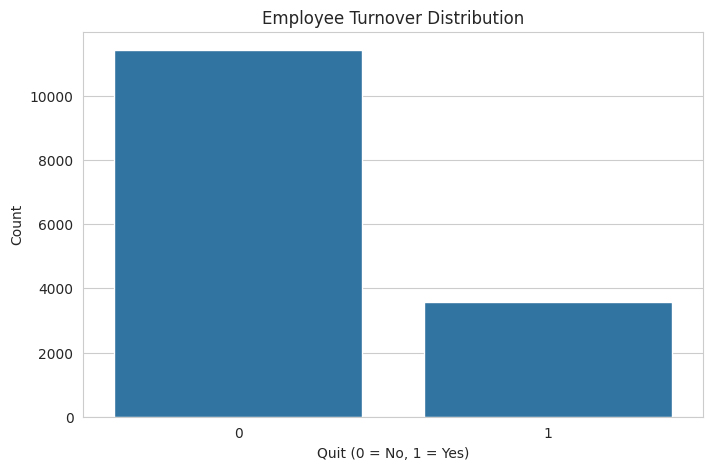

In [90]:
# Set style for plots
sns.set_style("whitegrid")

# 1. Target variable distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='quit', data=df)
plt.title('Employee Turnover Distribution')
plt.xlabel('Quit (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

3. Univariate Analysis (Numerical Features) &(categorial Feature)
---
🎯
This code performs univariate analysis on each column in the dataset:

1.   📊 For numerical features:
     It shows summary statistics (mean, min, max, etc.) and plots a histogram with a smooth curve to visualize the distribution.

2.   🔤 For categorical features:
    It displays all unique values, their counts, and creates a bar chart to show how often each category appears.

👉 This helps you understand the type, spread, and distribution of each feature in your dataset, which is important before modeling.






--- Examining Each Feature ---

--- Feature: satisfaction_level ---
Represents: Satisfaction Level
Data Type: Numerical
Distribution (Descriptive Statistics):
count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64


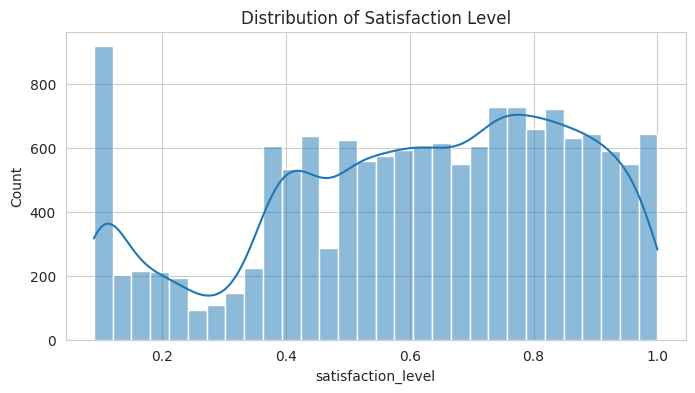


--- Feature: last_evaluation ---
Represents: Last Evaluation
Data Type: Numerical
Distribution (Descriptive Statistics):
count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64


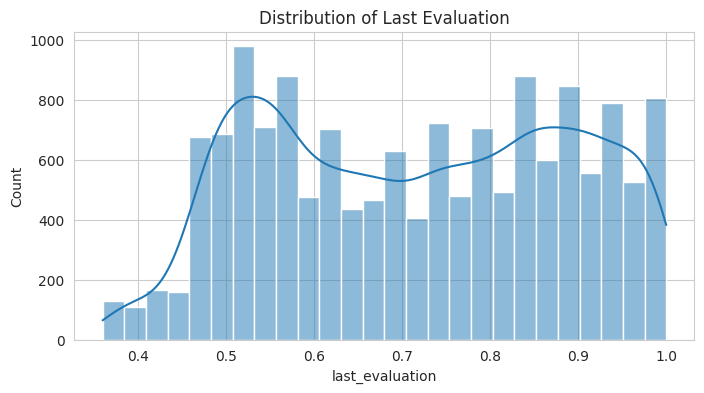


--- Feature: number_project ---
Represents: Number Project
Data Type: Numerical
Distribution (Descriptive Statistics):
count    14999.000000
mean         3.803054
std          1.232592
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_project, dtype: float64


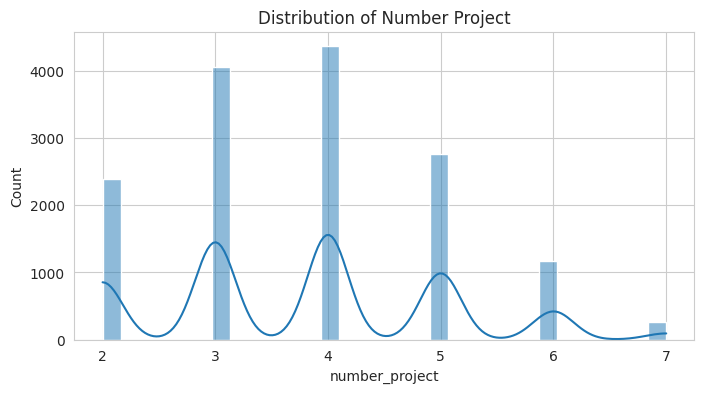


--- Feature: average_montly_hours ---
Represents: Average Montly Hours
Data Type: Numerical
Distribution (Descriptive Statistics):
count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64


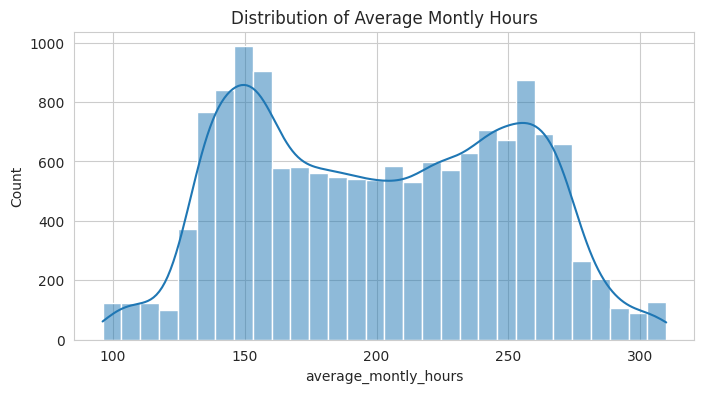


--- Feature: time_spend_company ---
Represents: Time Spend Company
Data Type: Numerical
Distribution (Descriptive Statistics):
count    14999.000000
mean         3.498233
std          1.460136
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spend_company, dtype: float64


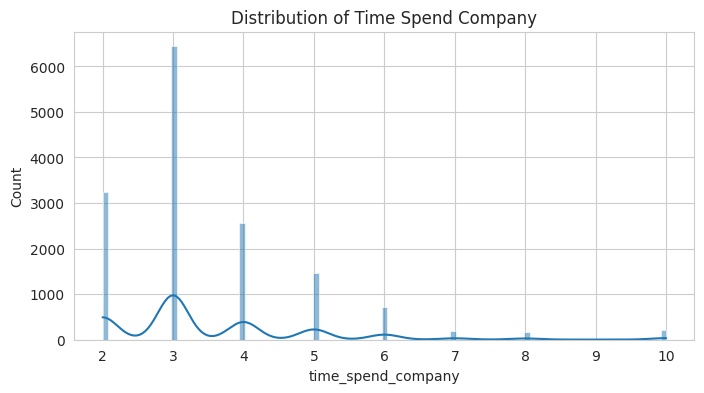


--- Feature: Work_accident ---
Represents: Work Accident
Data Type: Numerical
Distribution (Descriptive Statistics):
count    14999.000000
mean         0.144610
std          0.351719
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Work_accident, dtype: float64


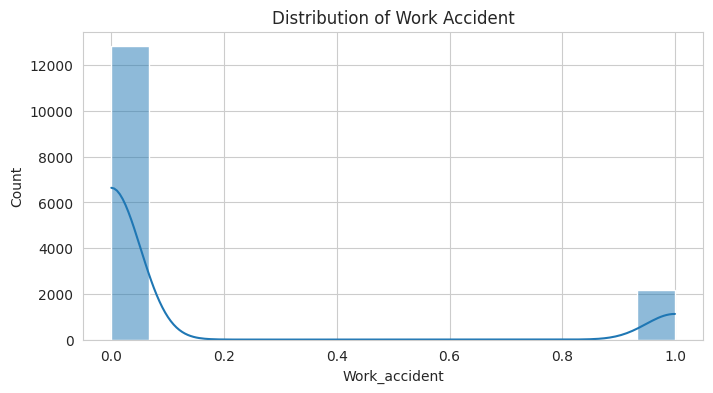


--- Feature: quit ---
Represents: Quit
Data Type: Numerical
Distribution (Descriptive Statistics):
count    14999.000000
mean         0.238083
std          0.425924
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: quit, dtype: float64


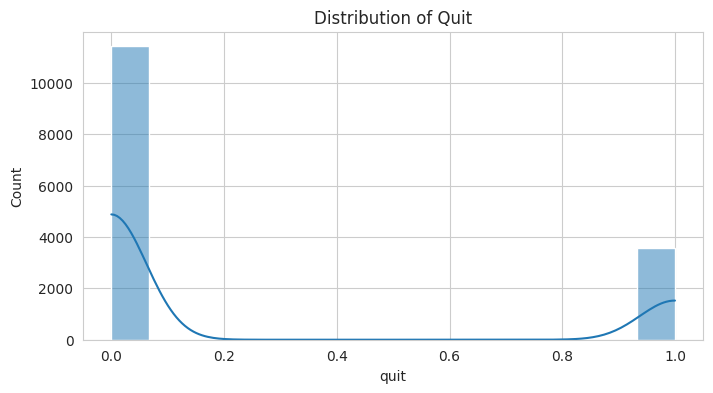


--- Feature: promotion_last_5years ---
Represents: Promotion Last 5Years
Data Type: Numerical
Distribution (Descriptive Statistics):
count    14999.000000
mean         0.021268
std          0.144281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: promotion_last_5years, dtype: float64


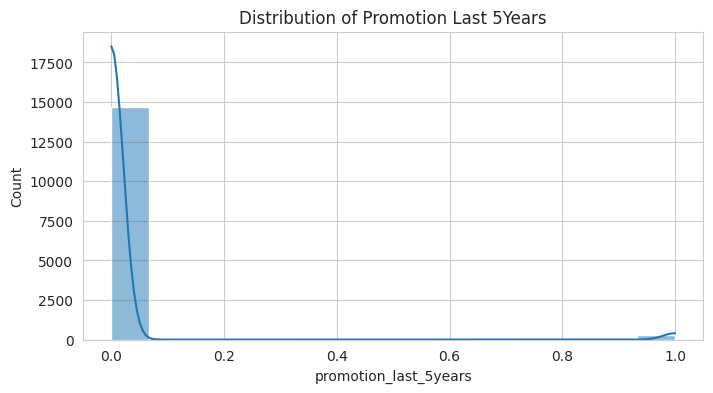


--- Feature: department ---
Represents: Department
Data Type: Categorical
Unique Values:
['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Value Counts:
department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64


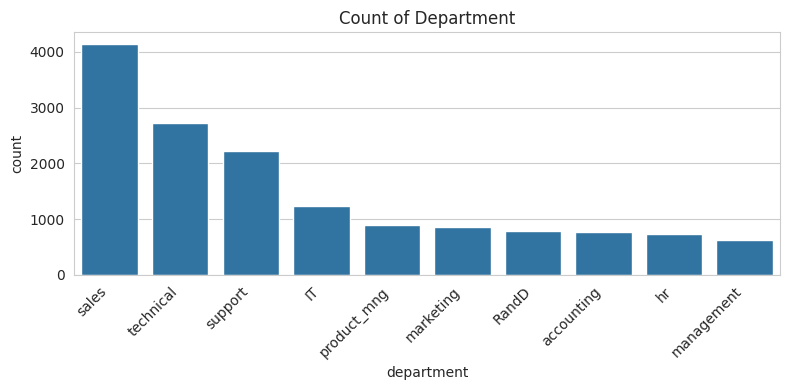


--- Feature: salary ---
Represents: Salary
Data Type: Categorical
Unique Values:
['low' 'medium' 'high']
Value Counts:
salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64


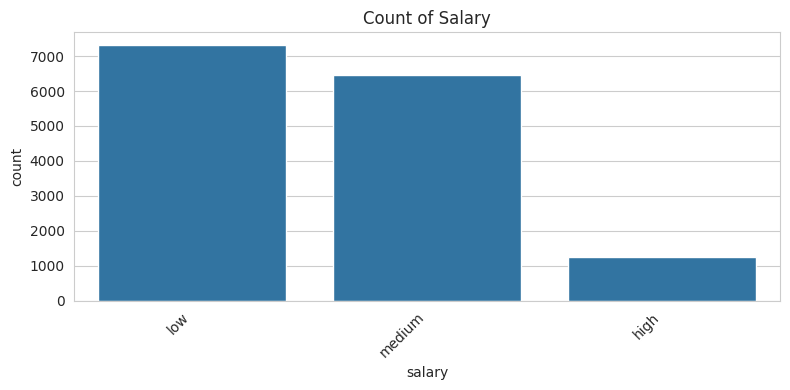

In [91]:
# ---3. Univariate Analysis (Numerical Features) &(categorial Feature) ---

print("\n--- Examining Each Feature ---")
for column in df.columns:
    print(f"\n--- Feature: {column} ---")
    print(f"Represents: {column.replace('_', ' ').title()}") # Basic representation based on column name

    if df[column].dtype in ['int64', 'float64']:
        print("Data Type: Numerical")
        print("Distribution (Descriptive Statistics):")
        print(df[column].describe())
        plt.figure(figsize=(8, 4))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column.replace("_", " ").title()}')
        plt.show()
    else:
        print("Data Type: Categorical")
        print("Unique Values:")
        print(df[column].unique())
        print("Value Counts:")
        print(df[column].value_counts())
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=column, order=df[column].value_counts().index)
        plt.title(f'Count of {column.replace("_", " ").title()}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

4. Target variable Analysis and Univariate Analysis (Numerical Features)
---



🎯 This code does visual analysis of the target variable (quit) and several numerical features in one combined figure using Seaborn and Matplotlib


1.  🧑‍💼 Target Variable (quit) Analysis:
*   
The first subplot shows a bar chart of employees who quit (1) vs. those who stayed (0).
* It also prints: It also prints:
1.   The count of each class
2.   The turnover rate as a precentage

2. 📊  Univariate Analysis of Numerical Features:  Loops through a list of 5 numeric columns


*   'satisfaction_level'
*   'last_evaluation'
*   'number_project'
*   'average_montly_hours'
*   'time_spend_company'


3.   🧩 Output:


*   one combine figure with 6 subplots (1 for target variable & 5 for numeric feature distributions)
*  Helps understand how each feature is distributed and whether any data imbalance or patterns exist.















--- Target Variable (quit) Distribution ---
quit
0    11428
1     3571
Name: count, dtype: int64
Turnover Rate: 23.81%


/tmp/ipython-input-92-1827822076.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quit', data=df, palette='viridis')
/tmp/ipython-input-92-1827822076.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=30, palette='coolwarm')
/tmp/ipython-input-92-1827822076.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=30, palette='coolwarm')
/tmp/ipython-input-92-1827822076.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=30, palette='coolwarm')
/tmp/ipython-input-92-1827822076.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, bins=30, palette='coolwarm')
/tmp

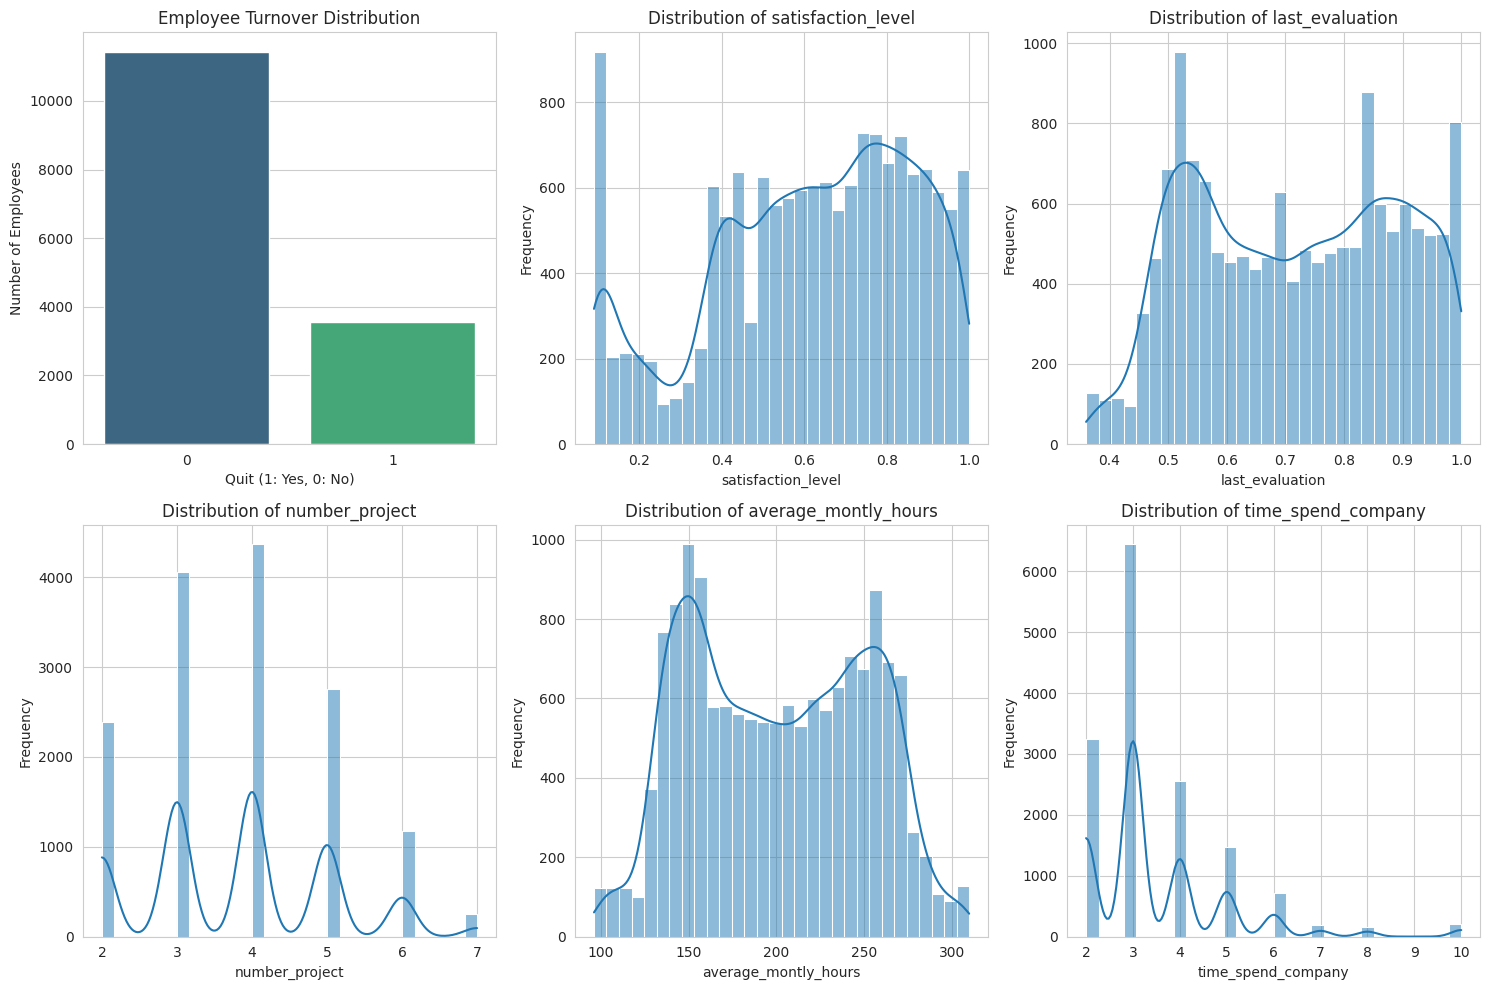

In [92]:
# Set style for plots
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# --- Target Variable Analysis ---
print("\n--- Target Variable (quit) Distribution ---")
plt.subplot(2, 3, 1)
sns.countplot(x='quit', data=df, palette='viridis')
plt.title('Employee Turnover Distribution')
plt.xlabel('Quit (1: Yes, 0: No)')
plt.ylabel('Number of Employees')
quit_counts = df['quit'].value_counts()
print(quit_counts)
print(f"Turnover Rate: {quit_counts[1] / len(df) * 100:.2f}%")

# --- Univariate Analysis (Numerical Features) ---
numerical_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 2)
    sns.histplot(df[col], kde=True, bins=30, palette='coolwarm')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

5. Univariate Analysis (Categorical Features)
---
🎯 This code performs Univariate Analysis on selected categorical features by visualizing them using bar charts.


1. 📦 Categorical Columns Analyzed:
*  'Work_accident' : Whether the employee had a work accident (1 = Yes, 0 = No).
*  'promotion_last_5years' : Whether they were promoted in the last 5 years.
*  'department' : The department the employee works in
*  'salary': The employee's salary level (e.g., low, medium, high).


2. 📊 What the Code Does:
*  Initializes a large figure (18×12 inches).
*  Loops through the 4 categorical columns.
*  For each column, it creates a bar chart (countplot) showing how many employees fall into each category.
*  Uses soft pastel colors for aesthetics.
*  Rotates x-axis labels for readability.
*  Organizes the plots into a 2×2 grid layout.
3. 🧩 Final Output:
* A visual summary of how categorical values are distributed across the dataset.
* Useful for spotting imbalances or dominant categories in the data.  







/tmp/ipython-input-93-496021779.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')
/tmp/ipython-input-93-496021779.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')
/tmp/ipython-input-93-496021779.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')
/tmp/ipython-input-93-496021779.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `le

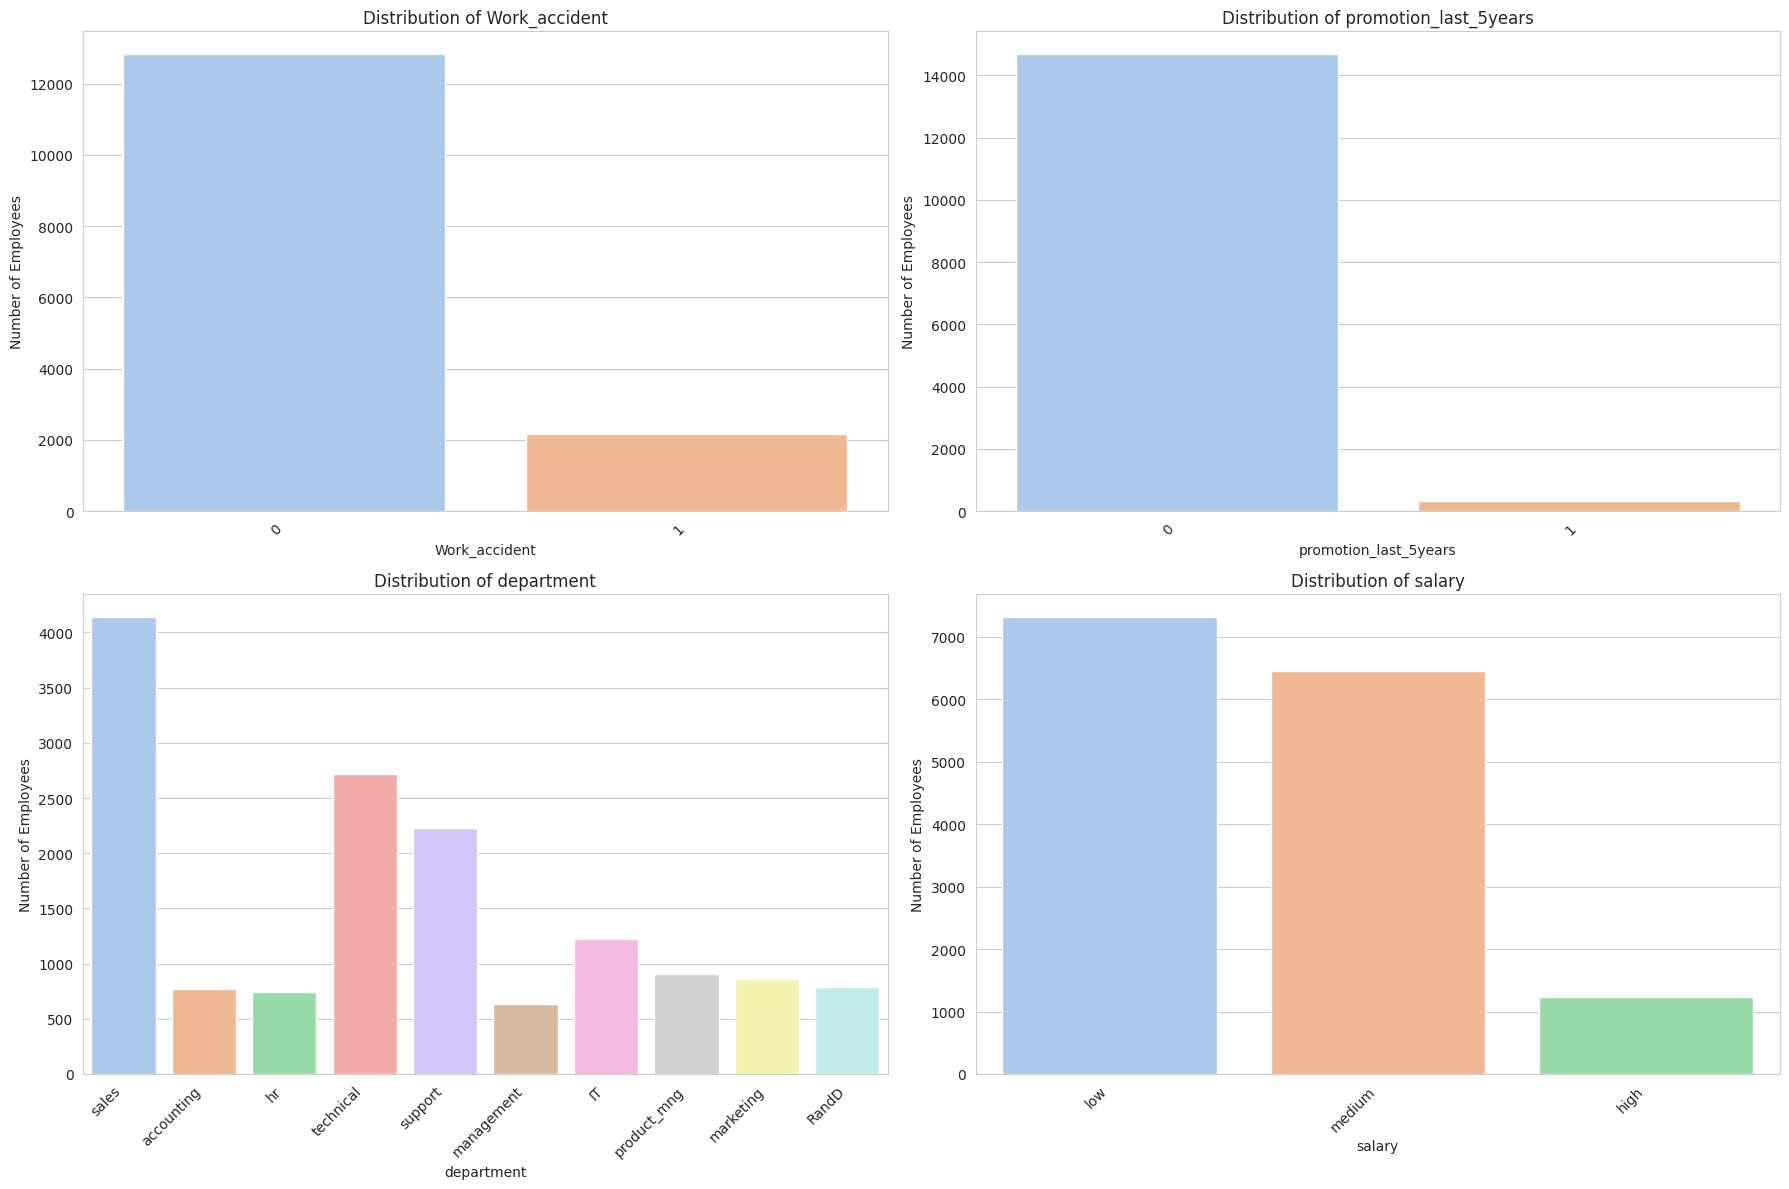

In [93]:
# --- Univariate Analysis (Categorical Features) ---
categorical_cols = ['Work_accident', 'promotion_last_5years', 'department', 'salary']
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Employees')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

6. statistical Analysis
---
🎯This code performs basic statistical analysis on the dataset, separating it into two parts: numerical features and categorical features.

1. 🔢 Numerical Features:  
*  Identifies numeric columns (satisfaction level, number of projects).
*  Excludes the target column (quit) if it's numeric.
*  Displays a descriptive statistics table (mean, min, max, std, etc.) to understand the distribution and range of values.
2. 🔤 Categorical Features:  
*  Identifies text-based (categorical) columns (e.g., department, salary).
* For each one, prints the percentage of each category to show how the data is distributed.  

3. 📋 Final Output:  
*  Numerical features → summary statistics table.
*  Categorical features → percentage breakdown of each category    








In [94]:
# Statistical Analysis

print("\n--- Descriptive Statistics for Numerical Features ---")
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Exclude the target variable if it's numerical and not a continuous feature
if target_variable in numerical_features:
    numerical_features.remove(target_variable)

if numerical_features:
    print(df[numerical_features].describe())
else:
    print("No numerical features found for descriptive statistics (excluding target variable).")

print("\n--- Analyzing Categorical Features Distribution ---")
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
if categorical_features:
    for feature in categorical_features:
        print(f"\nDistribution for {feature}:")
        print(df[feature].value_counts(normalize=True) * 100)
else:
    print("No categorical features found for distribution analysis.")


--- Descriptive Statistics for Numerical Features ---
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident  \
count          14999.000000        14999.000000   14999.000000   
mean             201.050337            3.498233       0.144610   
std               49.943099            1.460136       0.351719   
min               96.000000            2.000000       0.000000   
25%              156.000000            3.000000       0.

7.  Visualizations for Statistical Analysis
---
🎯 This code creates visual charts to analyze how features relate to the target variable (quit), also known as churn.


1. 📊  Categorical Features – Churn Comparison

* ⏬ For each categorical feature ( department, salary):  
*  Draws a grouped bar chart showing how many employees quit (1) vs. stayed (0) in each category.
*  Helps detect patterns or relationships between categorical features and churn.
* Example insight: Certain departments may have higher turnover.  
2. 🔢 Numerical Features – Churn Distribution

* ⏬For each numerical feature ( satisfaction_level, average_monthly_hours):  
* Draws overlapping histograms for quit vs. no-quit.  
* Shows how feature values differ between employees who quit and those who stayed.  
*  Useful to spot trends, such as lower satisfaction among employees who quit.

3. 🧩 Purpose:  

* These visualizations reveal how employee churn is affected by both categorical and numerical factors.  
*  Great for exploratory data analysis (EDA) before model building.







--- Creating Visualizations ---


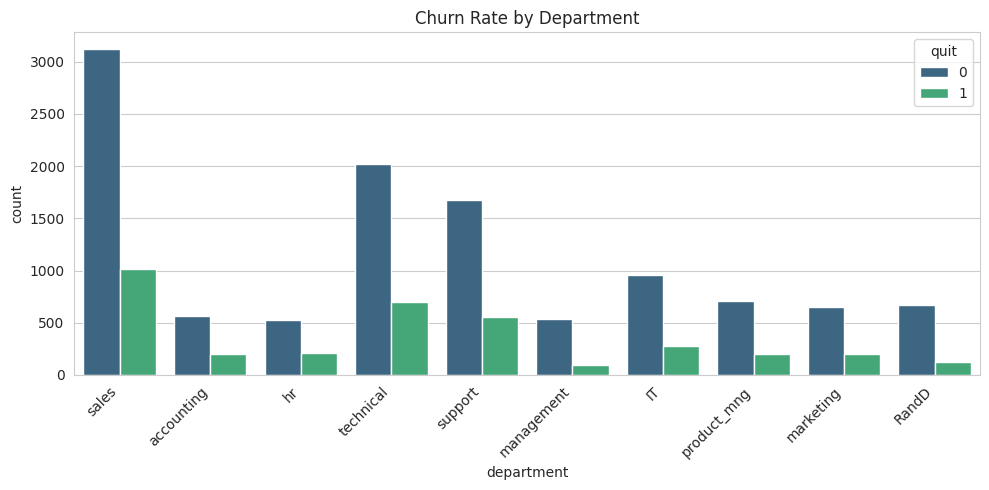

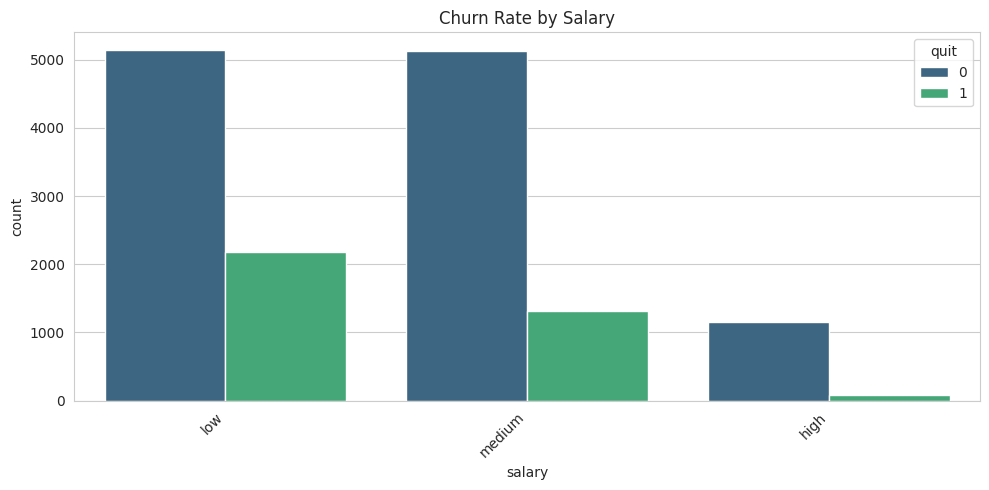

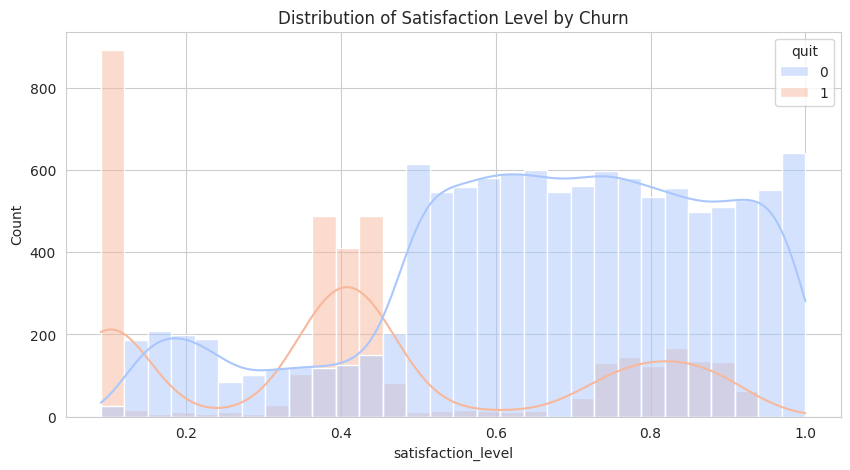

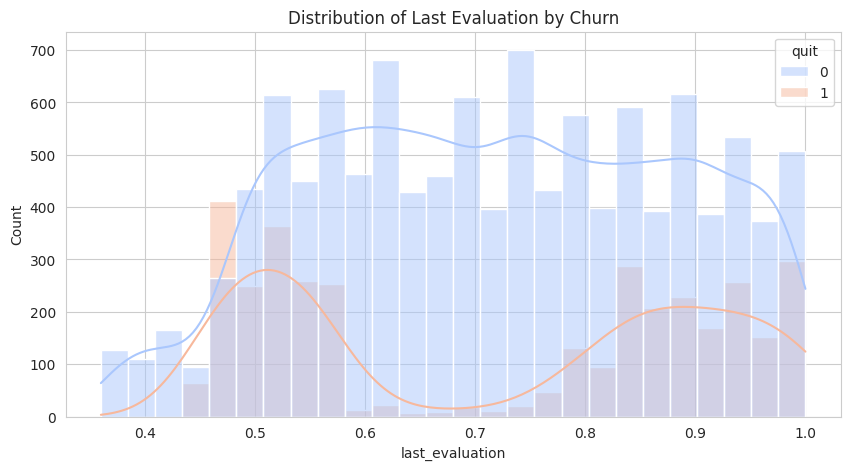

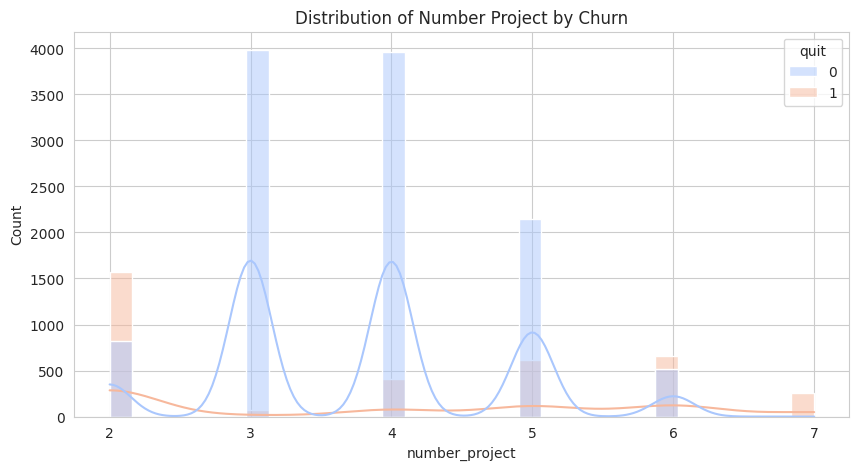

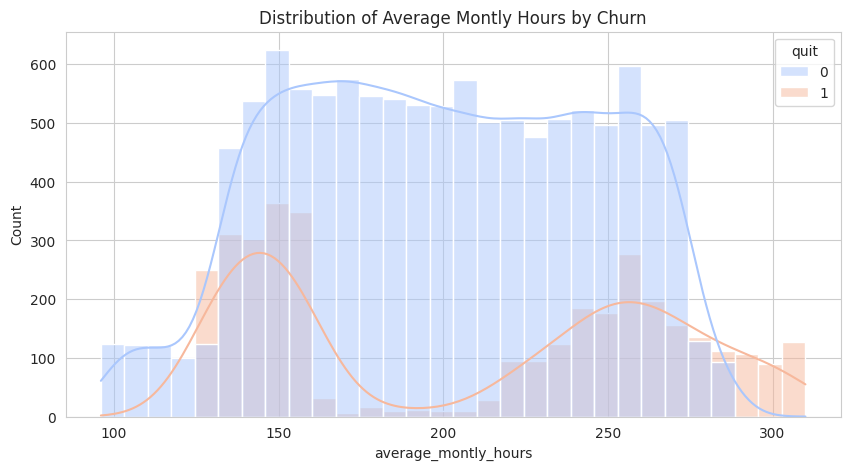

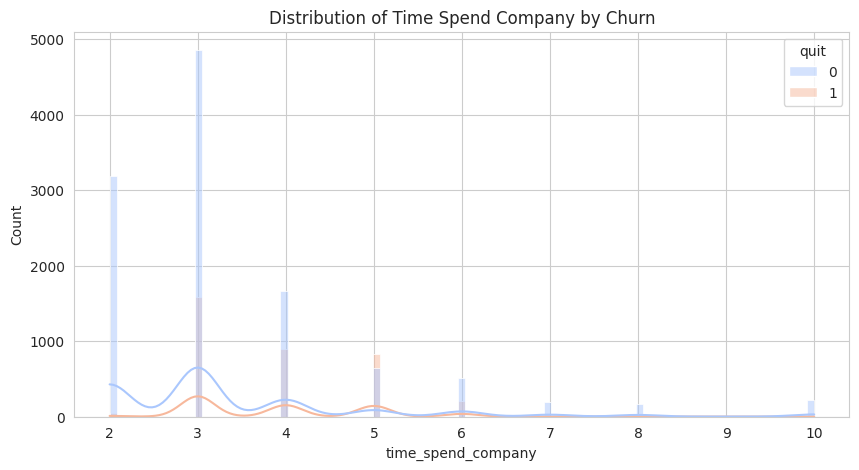

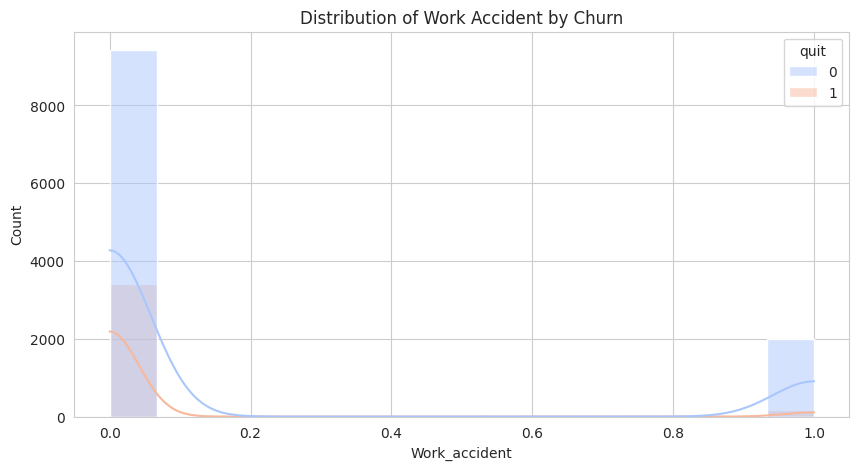

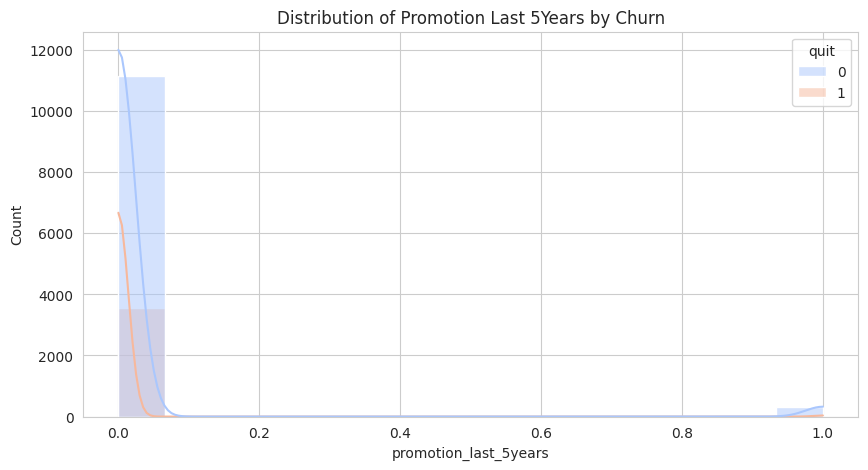

In [95]:
# Visualizations for Statistical Analysis

print("\n--- Creating Visualizations ---")

# Churn rate by different categories
categorical_features_for_churn = [col for col in df.select_dtypes(include='object').columns if col != target_variable]
for feature in categorical_features_for_churn:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature, hue=target_variable, palette='viridis')
    plt.title(f'Churn Rate by {feature.replace("_", " ").title()}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Distribution plots for numerical features (already done in Step 3, but can be re-emphasized)
# For numerical features, we can also look at their distribution conditioned on churn
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=feature, hue=target_variable, kde=True, palette='coolwarm')
    plt.title(f'Distribution of {feature.replace("_", " ").title()} by Churn')
    plt.show()

8. outlier Detection Using Box plots
---
🎯This code visually checks for outliers in the numerical features using box plots.



1. 🔍 What It Does:
```
for feature in numerical_features:
    sns.boxplot(x=df[feature])
```
*   Loops through each numerical column in the dataset.
* Creates a box plot for each feature: Shows the median, quartiles (Q1, Q3), and potential outliers (as individual points outside the whiskers).


2. 📦 Box Plot Highlights:
*  The box shows the interquartile range (IQR = Q3 - Q1).
* Lines (whiskers) extend to typical range values.
* Dots outside the whiskers = outliers (values that are unusually high or low).
3. 🎯 Purpose:
* Helps you quickly spot extreme values that might affect your model’s performance.
* Useful for deciding whether to remove, transform, or handle outliers during preprocessing.








--- Checking for Outliers in Numerical Data (using Box Plots) ---


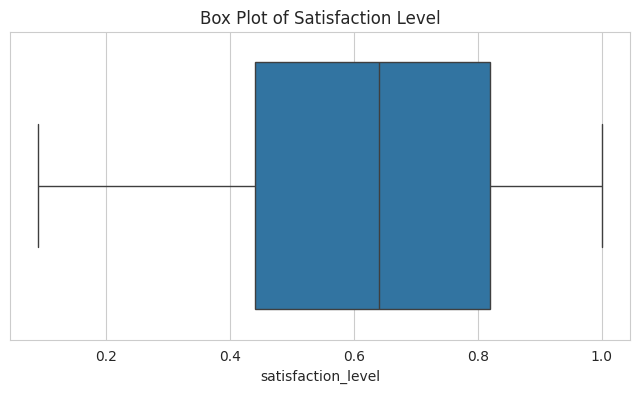

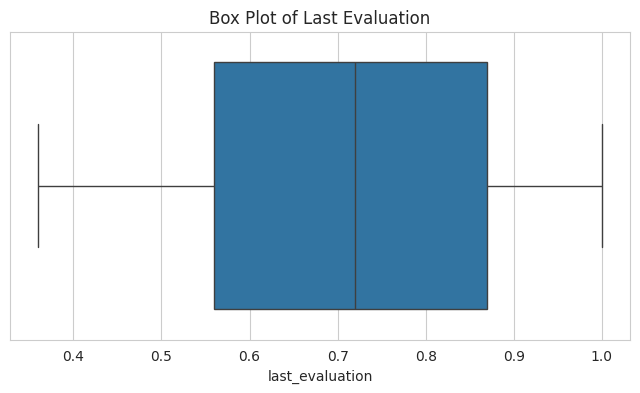

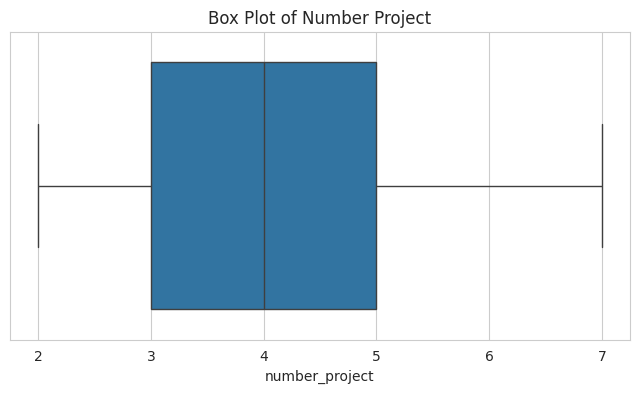

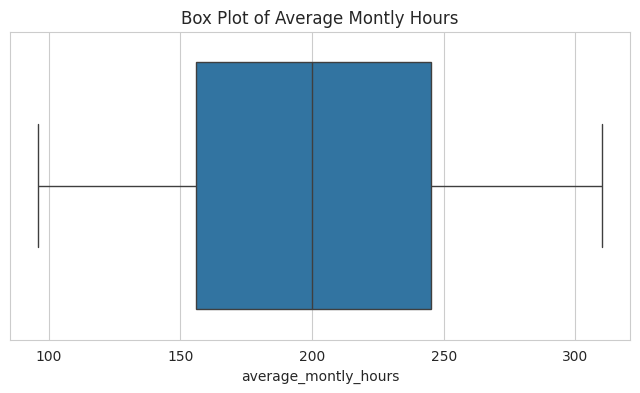

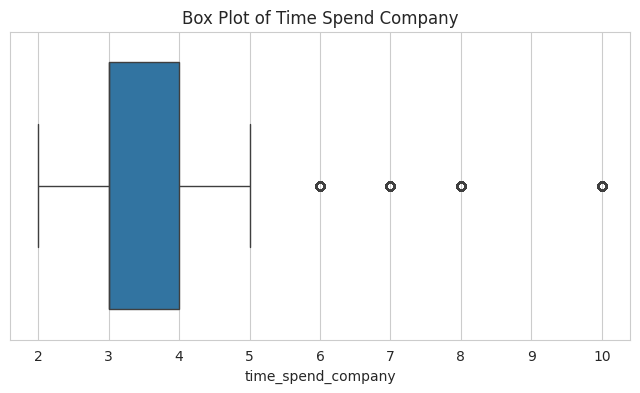

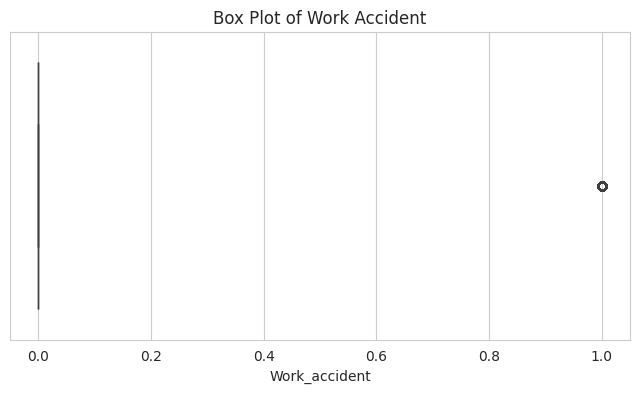

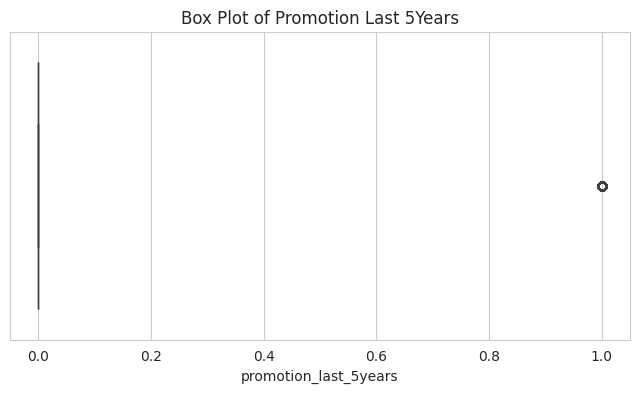

In [96]:
print("\n--- Checking for Outliers in Numerical Data (using Box Plots) ---")
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature.replace("_", " ").title()}')
    plt.show()

9. outlier Detection Using BOX plots (combined Boxplot for outliers)
---
🎯 This code creates a boxplot for several numerical features in one chart to help detect outliers.



1.  📦Combined Boxplot (All Together)


```
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['satisfaction_level', 'last_evaluation', ...]])
```


*  Creates a single chart with boxplots for multiple features side-by-side.
*  Good for quick comparison between features.
*  Saves space and gives an overall view.
  










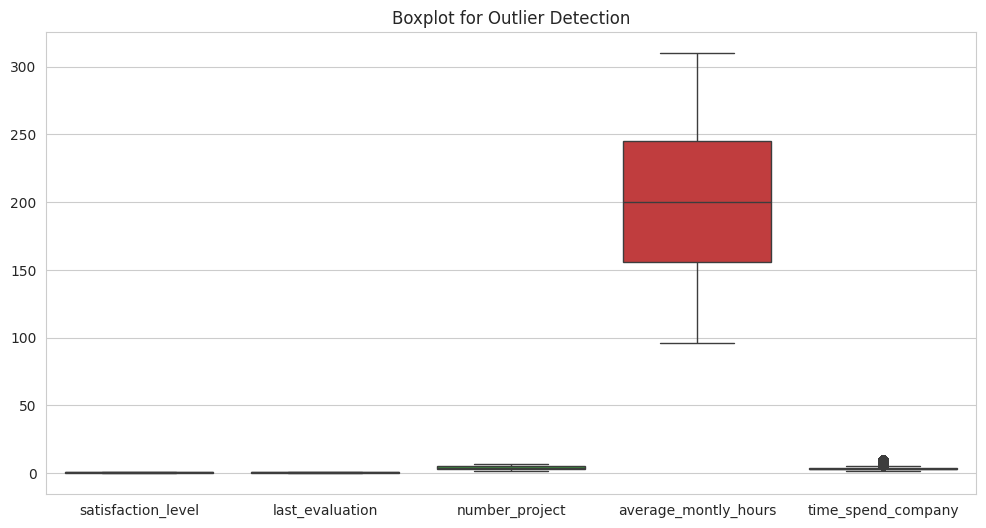

In [97]:
# Create a boxplot to detect outliers in numarical data
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']])
plt.title('Boxplot for Outlier Detection')
plt.show()


10. Bivariate Analysis (Feature(numarical & Categorical)) vs. Target)
---
🎯 This code performs bivariate analysis, which means it examines the relationship between each feature and the target variable (quit).


1. ✅  Numerical Features vs. quit

```
sns.boxplot(x='quit', y=col, data=df)

```
* It shows a boxplot grouped by quit status (0 = stayed, 1 = quit).
*Helps you see how the values change depending on whether the employee quit   
* Useful to spot patterns like low satisfaction among those who left.

2.✅ Categorical Features vs. quit


```
sns.countplot(x=col, hue='quit', data=df)

```
* It shows a bar chart grouped by quit status.  
* Lets you compare how many employees quit in each category.
* Helps find which groups have higher turnover (e.g., low salary = more quits)


3. 🎯 Purpose:  
*  Understand how each feature is related to employee turnover.
*  Useful for selecting features or understanding important drivers of churn



/tmp/ipython-input-98-1763241573.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quit', y=col, data=df, palette='coolwarm')
/tmp/ipython-input-98-1763241573.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quit', y=col, data=df, palette='coolwarm')
/tmp/ipython-input-98-1763241573.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quit', y=col, data=df, palette='coolwarm')
/tmp/ipython-input-98-1763241573.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the

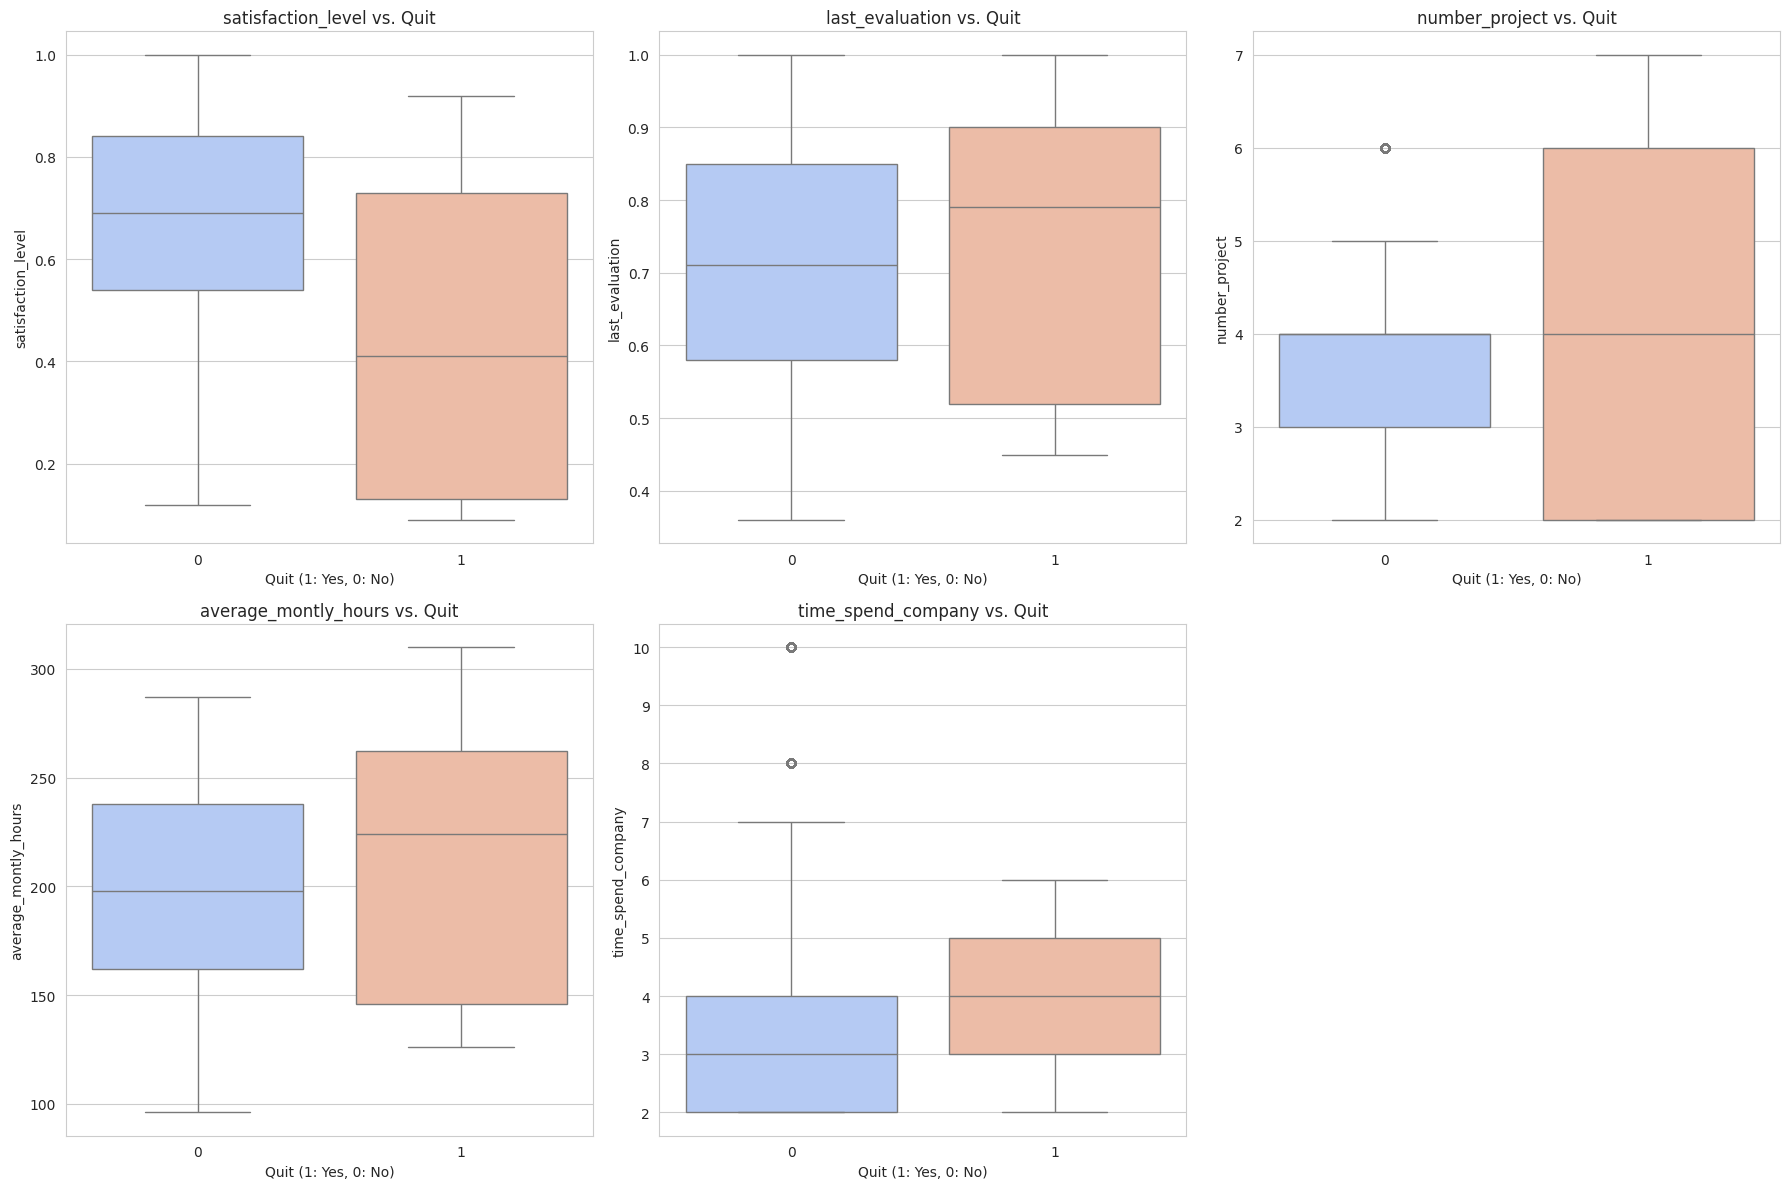

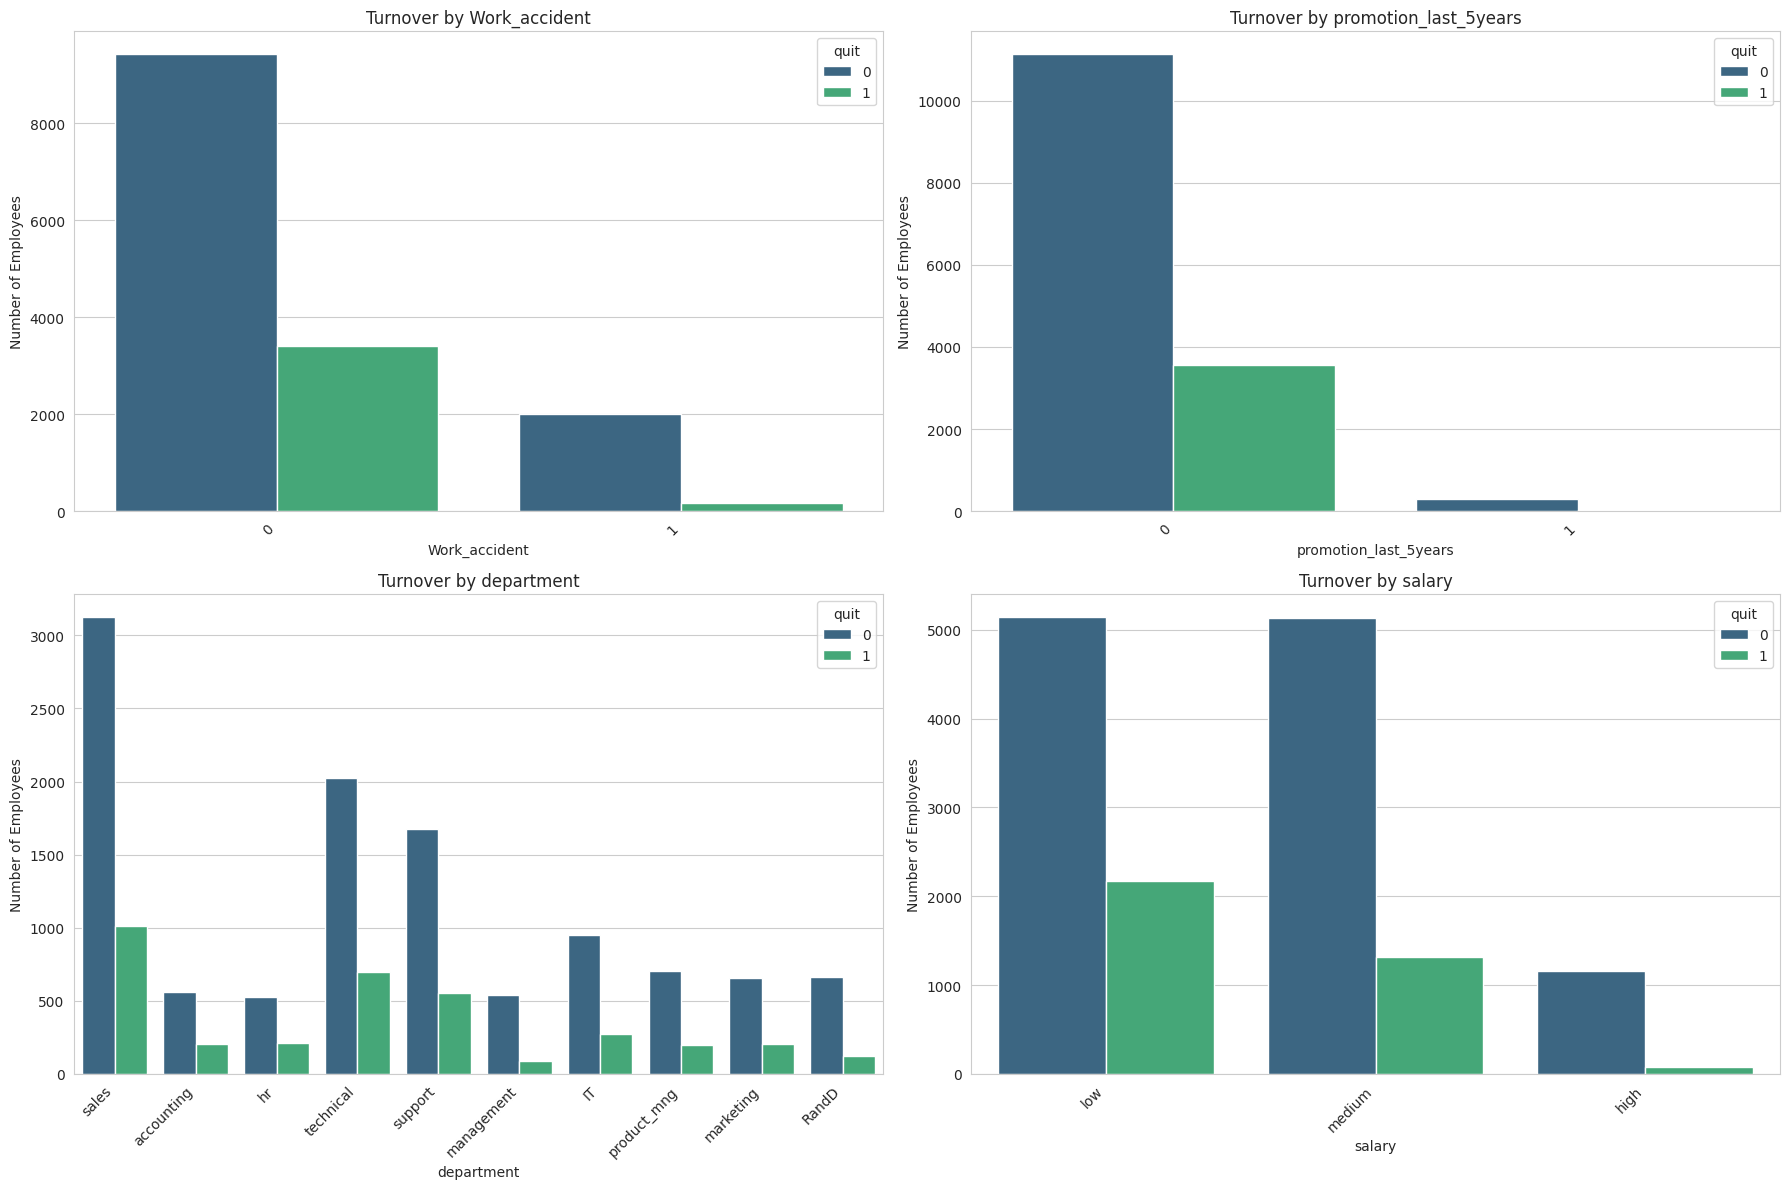

In [98]:
# --- Bivariate Analysis (Feature(numarical & Categorical)) vs. Target) ---
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='quit', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} vs. Quit')
    plt.xlabel('Quit (1: Yes, 0: No)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


plt.figure(figsize=(18, 12))
categorical_cols = ['Work_accident', 'promotion_last_5years', 'department', 'salary']
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, hue='quit', data=df, palette='viridis')
    plt.title(f'Turnover by {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Employees')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

11. Convert categorical variables to numerical
---


*  🔢 Converts the 'salary' column from text to numbers (low = 0, medium = 1, high = 2).

*  🧾 Converts the 'department' column into multiple binary (0/1) columns using one-hot encoding.
*  📊 Prints how many employees quit and how many did not quit.







In [99]:
df_encoded = df.copy()

In [100]:
# Convert categorical variables to numerical
df_encoded['salary'] = df['salary'].map({'low': 0, 'medium': 1, 'high': 2})

In [101]:
df_encoded["salary"].value_counts()

,count
salary,
0,7316
1,6446
2,1237


In [102]:
df_encoded["department"].value_counts()

,count
department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [103]:
df_encoded = pd.get_dummies(df_encoded, columns=['department'])

In [104]:
df_encoded.head(40)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
6,0.10,0.77,6,247,4,0,1,0,0,False,False,False,False,False,False,False,True,False,False
7,0.92,0.85,5,259,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
8,0.89,1.00,5,224,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
9,0.42,0.53,2,142,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [107]:



# Check the target variable distribution
print(df_encoded['quit'].value_counts())

quit
0    11428
1     3571
Name: count, dtype: int64


12 . correlation matrix


---



🎯 This code creates a correlation heatmap to show how all numerical features (including the target 'quit') are related to each other.


* 🔗 Correlation measures how strongly two variables move together (values range from -1 to +1).  

* 📊 The heatmap uses colors and numbers to show:  
1.  Positive correlation (closer to +1) = both increase together
2.  Negative correlation (closer to -1) = one increases, the other decreases
3. Near 0 = little to no relationship







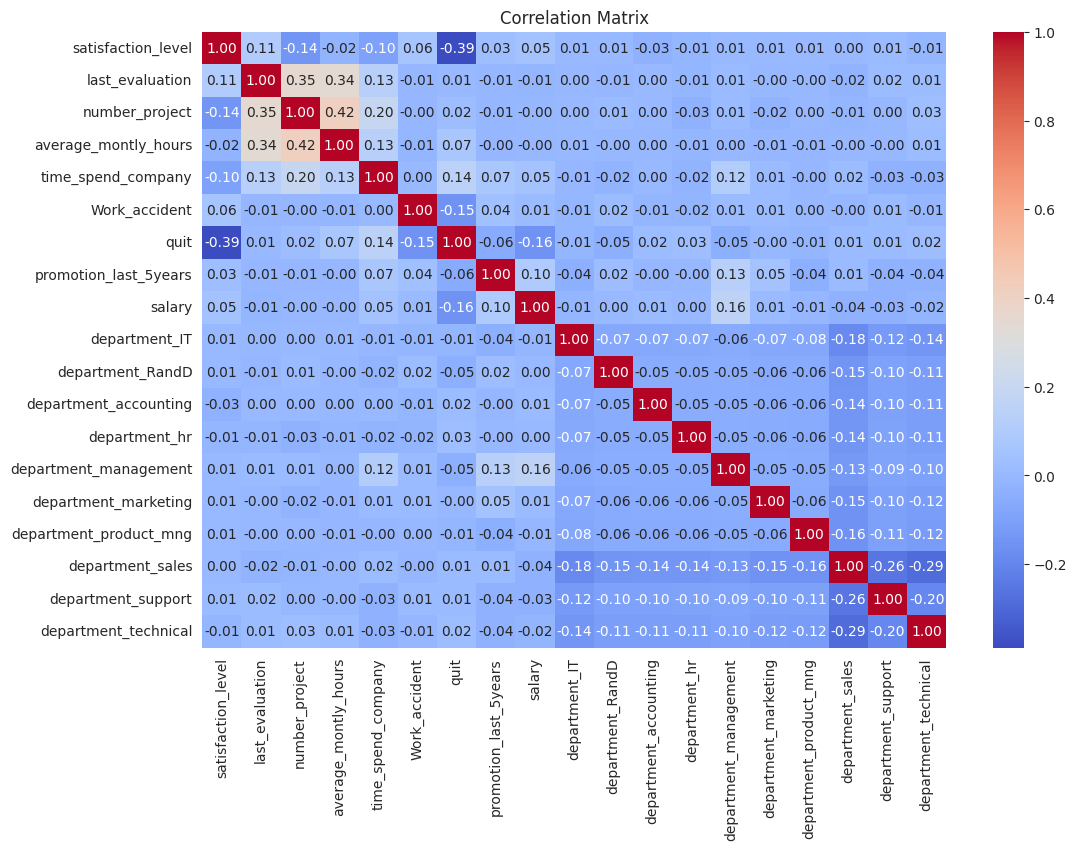

In [106]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [108]:
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


# Ask The Right Questions.

What percentage of employees left the company vs. stayed?

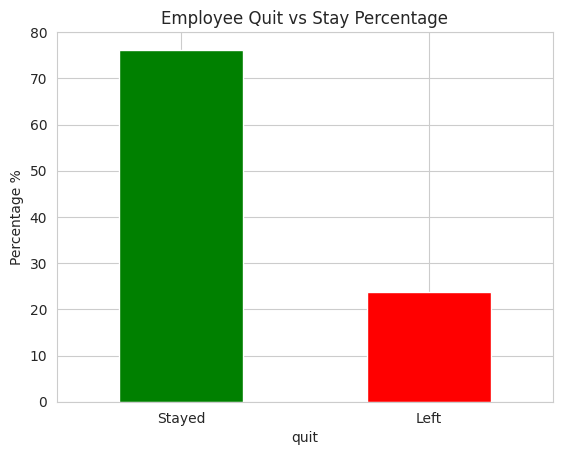

In [109]:
quit_counts = df['quit'].value_counts(normalize=True) * 100
quit_counts.plot(kind='bar', color=['green', 'red'])
plt.title("Employee Quit vs Stay Percentage")
plt.xticks([0, 1], ['Stayed', 'Left'], rotation=0)
plt.ylabel("Percentage %")
plt.show()


In [110]:
print(quit_counts)

quit
0    76.191746
1    23.808254
Name: proportion, dtype: float64


Are there any departments with a significantly higher quit rate?

In [111]:
# Get department column names
department_cols = [col for col in df_encoded.columns if col.startswith("department_")]

In [112]:
department_cols

['department_IT',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sales',
 'department_support',
 'department_technical']

What melt() Does:

It "unpivots" your DataFrame — turning multiple columns into rows.

In [114]:
department_data = df_encoded.melt(id_vars=["quit"],
                                  value_vars=department_cols,
                                  var_name="department",
                                  value_name="is_in_department")

In [117]:
department_data.head()

,quit,department,is_in_department
0,1,department_IT,False
1,1,department_IT,False
2,1,department_IT,False
3,1,department_IT,False
4,1,department_IT,False


department_data[department_data['is_member']]:
Filters to only rows where is_member == True, meaning:

Only consider rows where an employee actually belongs to that department.

.groupby('department')['quit'].mean():

Groups data by department.

Takes the mean of the quit column → This gives the quit rate for that department.

Since quit is 1 (left) and 0 (stayed), the mean = % who left.

.sort_values(ascending=False):

Sorts departments by quit rate from highest to lowest.



In [118]:
department_quit_rate = (
    department_data[department_data["is_in_department"]].groupby("department")["quit"].mean().sort_values(ascending=False)
)

In [119]:
department_quit_rate.head()

,quit
department,
department_hr,0.290934
department_accounting,0.265971
department_technical,0.256250
department_support,0.248991
department_sales,0.244928


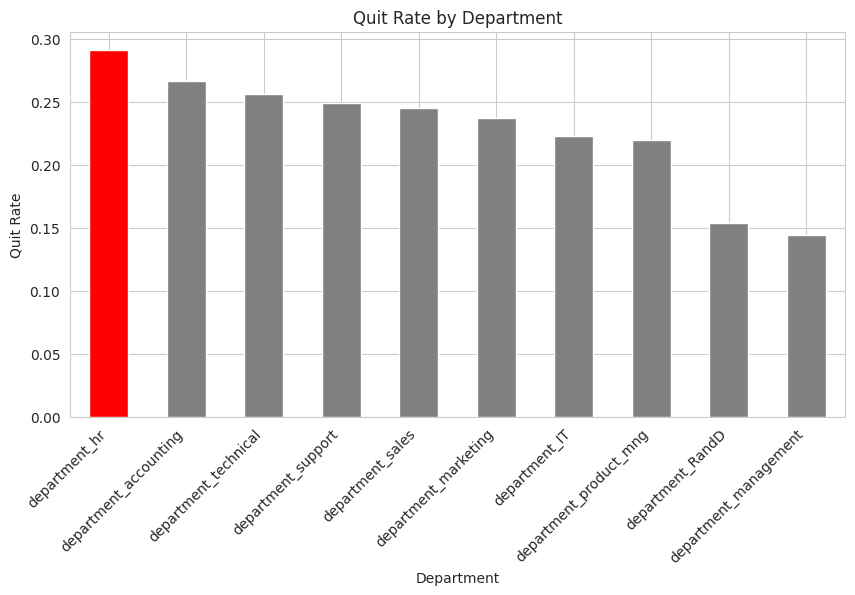

In [122]:
colors = ["red" if dept == "department_hr" else "gray" for dept in department_quit_rate.index]
department_quit_rate.plot(kind="bar",color = colors,figsize=(10,5))
plt.title("Quit Rate by Department")
plt.ylabel("Quit Rate")
plt.xlabel("Department")
plt.xticks(rotation=45, ha='right')
plt.show()

Are employees with higher overtime frequency more likely to leave?

In [123]:
import seaborn as sns

df_encoded["hours_level"] = pd.cut(df_encoded['average_montly_hours'],bins = [0,160,200,240,300],labels=["low","medium","high","very high"])

In [124]:
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,hours_level
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,low
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False,very high
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,very high
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,high
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,low


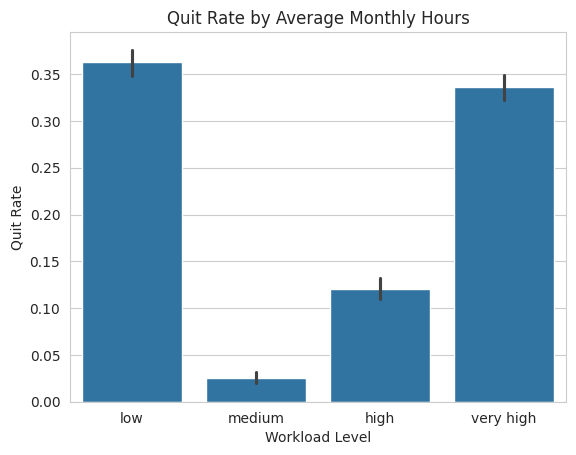

In [125]:
sns.barplot(x="hours_level",y="quit",data=df_encoded)
plt.title("Quit Rate by Average Monthly Hours")
plt.ylabel("Quit Rate")
plt.xlabel("Workload Level")
plt.show()

Is there a relationship between salary and quit?


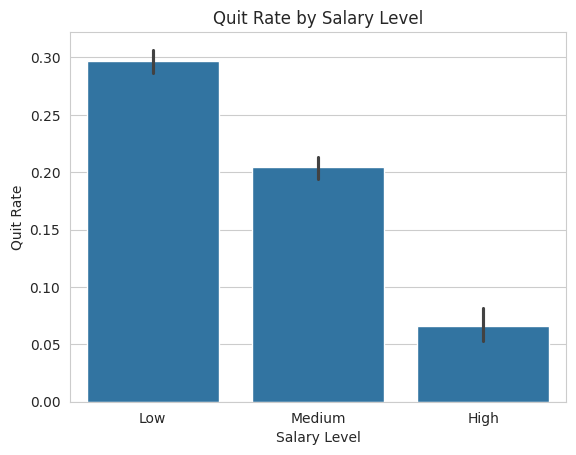

In [129]:
sns.barplot(x="salary",y="quit",data=df_encoded)
plt.title("Quit Rate by Salary Level")
plt.xlabel("Salary Level")
plt.ylabel("Quit Rate")
plt.xticks(ticks=[0,1,2],labels=["Low","Medium","High"])
plt.show()

Do employees with low job satisfaction leave more often?

What is the distribution of income across different departments and roles?

Does number of years since last promotion influence Quit?

Are employees with higher overtime frequency more likely to leave?